In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
sub=train['PassengerId']

In [5]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

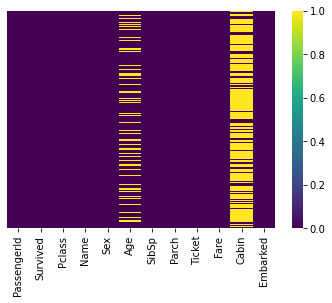

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [9]:
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C


In [10]:
#train.rename(columns = {'Sex':'Gender'}, inplace = True)

In [11]:
#train.head()

In [12]:
#train['Gender']=train['Gender'].map({'female':0,'male':1})

In [13]:
#train.head(5)

<AxesSubplot:xlabel='Survived', ylabel='count'>

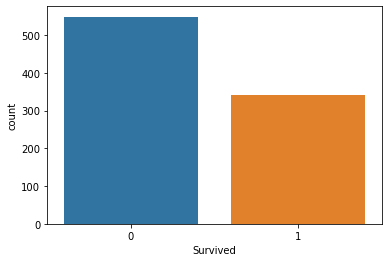

In [14]:
sns.countplot(x=train['Survived'])

In [15]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

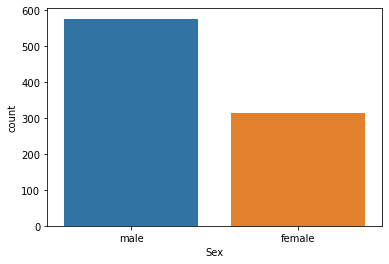

In [16]:
sns.countplot(x=train['Sex'])

In [17]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

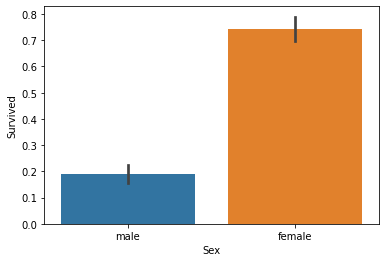

In [18]:
sns.barplot(x='Sex',y='Survived',data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

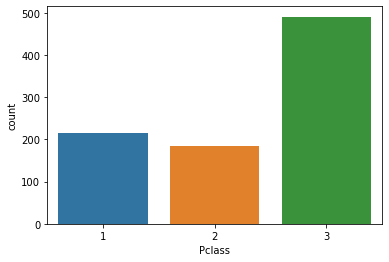

In [19]:
sns.countplot(x=train['Pclass'])

In [20]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

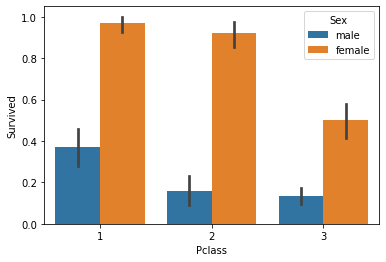

In [21]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=train)

<AxesSubplot:>

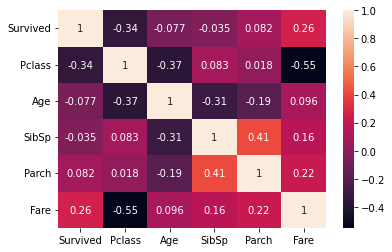

In [22]:
sns.heatmap(train.corr(),annot=True)

C:\Users\dell\.anaconda\navigator\.anaconda\anaconda1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

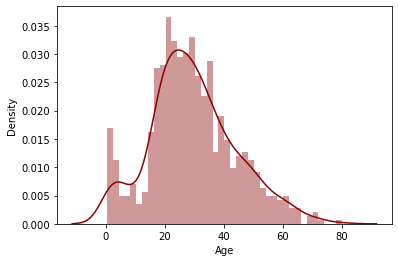

In [23]:
sns.distplot(train['Age'].dropna(),kde=True,color='darkred',bins=40)

In [24]:
#observation :most of passengers age b/w 15 to 40

<AxesSubplot:xlabel='SibSp', ylabel='count'>

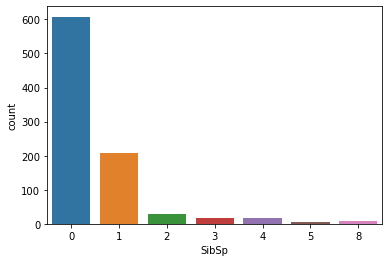

In [25]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

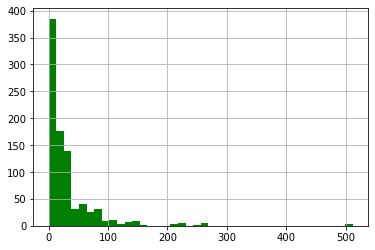

In [26]:
train['Fare'].hist(color='green',bins=40)

In [27]:
####removing null values

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

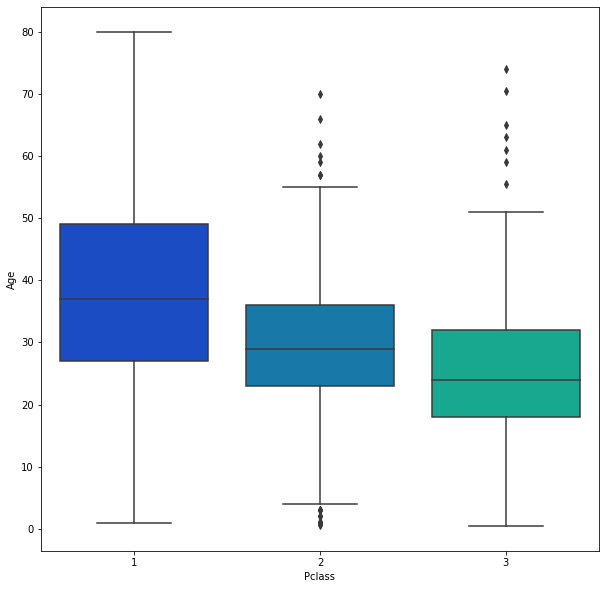

In [28]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


In [29]:
#observation: in 1st class avg age of passengers is 38
#in 2nd class avg age is 29
# in 3rd class avg age is 24

In [30]:
#fill na value in age column
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
    
       if Pclass==1:
            return 38
    
       elif Pclass==2:
            return 29
    
       else:
            return 24
    
    else:
        return Age
              

In [31]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

In [32]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [33]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
train['Embarked']=train['Embarked'].fillna('S')

In [35]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [36]:
#train['Cabin'].fillna(train['Cabin'].mode()[0], inplace = True)

In [37]:
train.drop('Cabin',axis=1,inplace=True)

In [38]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [40]:
train.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [41]:
cat=['Sex','Embarked']

In [42]:
cat

['Sex', 'Embarked']

In [43]:
train[cat]=train[cat].astype('category')

In [44]:
num=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [45]:
num

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [46]:
y=train['Survived']

In [47]:
X=train.drop(['Survived'],axis=1)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123,stratify=y)

In [50]:
X_train.shape

(712, 7)

In [51]:
X_test.shape

(179, 7)

In [52]:
y_train.shape

(712,)

In [53]:
y_test.shape

(179,)

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler=StandardScaler()
scaler.fit(X_train[num])

StandardScaler()

In [56]:
X_train_std = scaler.transform(X_train[num])
X_test_std = scaler.transform(X_test[num])

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(X_train[cat])

OneHotEncoder(handle_unknown='ignore')

In [59]:
X_train= enc.transform(X_train[cat]).toarray()
X_test= enc.transform(X_test[cat]).toarray()

In [60]:
X_train1=np.concatenate([X_train_std,X_train],axis=1)
X_test1=np.concatenate([X_test_std,X_test],axis=1)        

In [61]:
X_train1.shape

(712, 10)

In [62]:
X_test1.shape

(179, 10)

In [63]:
#model building

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train1,y_train)

LogisticRegression()

In [64]:
y_prediction_train=lr.predict(X_train1)
y_prediction_test=lr.predict(X_test1)

In [65]:
y_prediction_test

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [66]:
y_prediction_train

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,

In [67]:
prediction=np.concatenate([y_prediction_train,y_prediction_test])

In [68]:
 from sklearn.metrics import confusion_matrix, accuracy_score,recall_score, precision_score,f1_score

In [69]:
accuracy=confusion_matrix(y_test,y_prediction_test)

In [70]:
accuracy

array([[97, 13],
       [19, 50]], dtype=int64)

In [71]:
def evaluate_model(act, pred):
        from sklearn.metrics import confusion_matrix, accuracy_score,recall_score, precision_score,f1_score
        print("Confusion Matrix \n", confusion_matrix(act, pred))
        print("Accurcay : ", accuracy_score(act, pred))
        print("Recall   : ", recall_score(act, pred))
        print("Precision: ", precision_score(act, pred))  
        print('F1 Score:\n',f1_score(act,pred))

In [72]:
print("Train")
evaluate_model(y_train, y_prediction_train)
print("Test")
evaluate_model(y_test,y_prediction_test)

Train
Confusion Matrix 
 [[381  58]
 [ 81 192]]
Accurcay :  0.8047752808988764
Recall   :  0.7032967032967034
Precision:  0.768
F1 Score:
 0.7342256214149141
Test
Confusion Matrix 
 [[97 13]
 [19 50]]
Accurcay :  0.8212290502793296
Recall   :  0.7246376811594203
Precision:  0.7936507936507936
F1 Score:
 0.7575757575757576


In [73]:
#submission=pd.DataFrame(predictions)

In [74]:
#submission

In [75]:
sub

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [76]:
submission = pd.DataFrame({'PassengerId':sub,'Survived':prediction})


In [77]:
submission

,PassengerId,Survived
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
...,...,...
886,887,0
887,888,0
888,889,0
889,890,0


In [78]:
submission.to_pickle('titanic pickle')